# COVID-19 Testing #

#### Gerrard Hye Min Kim (hkim624@wisc.edu), Nathan  Vicen (nvicen@wisc.edu), and Dana Ingram (dolsen5@wisc.edu)

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-Model)
1. [Code Implementation](#3.-Code-Implementation)
    1. [Model 1A](#A.-Model-1A)
    1. [Model 1B](#B.-Model-1B)
    1. [Model 2](#C.-Model-2)
1. [Results and Discussion](#4.-Results-and-Discussion)
1. [Conclusion](#5.-Conclusion)
1. [Author Contributions](#6.-Author-Contributions)

## 1. Introduction ##

Our project is about the COVID-19 virus outbreak in the United States that has upheaved nearly every aspect our of day to day life. The goal is to assess our ability to react to the fast spread of the virus by focusing on the amount of medical labs and their locations across the country to adequately test citizens for the virus. Testing individuals for the virus is believed to be a crucial first step in limiting the spread and subsequent harm of COVID-19.  As these tests are limited, we want to ensure that citizens in areas where infection is heavily present, and/or is likely to increase, are prioritized. 

COVID-19 (commonly known as Coronavirus) is a respiratory illness that can quickly spread from person to person. The virus that causes COVID-19 is a novel coronavirus that was first identified during an investigation into an outbreak in Wuhan, China (www.cdc.gov/COVID19). According to NPR, COVID-19 has been detected in at least 114 countries, infected more than 1.1 million people and has resulted in more than 65,000 deaths in the U.S. alone (CDC U.S. Statistics)[https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/cases-in-us.html]. As a result, the World Health Organization (WHO) has declared COVID-19 a pandemic ([COVID-19 Is Now Officially A Pandemic, WHO Says](https://www.npr.org/sections/goatsandsoda/2020/03/11/814474930/coronavirus-covid-19-is-now-officially-a-pandemic-who-says). In the last few months the United States has seen its cases of the virus and the number of infections rise substantially, and the list of areas infected are growing. Of course while testing individuals is very important in stopping the spread of the virus, tests are very limited: USA Today estimates that 10,000 tests, across 100 labs in the U.S., can be performed each day ([How can I get tested for coronavirus? What you should know about test kits](https://www.usatoday.com/story/news/health/2020/03/06/coronavirus-test-kit-how-can-get-tested-us-covid-19-virus/4973697002/). 

So our project is to decide how many medical testing labs for the virus should be built in each state (higher virus case densities are taken into account for lab locations) and minimizing the number of days it takes each state to test a certain amount of people. We disregard any other medical centers/hospitals already in place and solely consider the testing capabilities of our own hypothetical testing centers. We will be using multiple models that affect testing by basing them on differing parameters such as state population, number of confirmed virus cases per state, and the number of tests that can be administered, to see how the locations of labs and number of days to test citizens may change. We will then compare these results to real COVID-19 testing statistics and discuss their implications.


For our model calculations we require the population of each state, which was from the U.S. Census. Additionally, COVID-19 data, such as the number of confirmed cases and deaths, which were found at CDC website. Our conclusion mentions data specific to New York City, which analyzes deaths according to age group. CSV files and links accessed are listed below. 
#### U.S. Population Data per State ####
&nbsp; 
<a href="./population.csv">Population Data</a>   (CSV)
&nbsp; Population estimates of each U.S. state, from the <a href="https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html">United States Census Bureau</a>.\
&nbsp; Data from July 1, 2019 (most recent estimate data).

#### U.S. Population Distribution by Age per State ####
&nbsp; <a href="./us_age_per3.csv">Population Distribution by Age Data</a>   (CSV)
&nbsp; Population distribution by age of each U.S. state, from the <a href="https://www.kff.org/other/state-indicator/distribution-by-age/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D">Kaiser Family Foundation </a>.\
&nbsp; Data from 2018.

#### U.S. COVID-19 Cases Data per State ####
&nbsp; <a href="./current2.csv">COVID-19 Cases Data</a>   (CSV)
&nbsp; Total number of COVID-19 cases reported by each U.S. state, from the <a href="https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/cases-in-us.html">Centers for Disease Control and Prevention (CDC)</a>.\
&nbsp; Data from April 25, 2020.

#### New York City COVID-19 Fatality Rates per Age ####
&nbsp; <a href="./death_by_age.csv">NYC COVID-19 Fatality Rate by Age Data</a>   (CSV)
&nbsp; COVID-19 fatality rates per age in New York City, NY from the<a href="https://www1.nyc.gov/site/doh/covid/covid-19-data.page">NYC Healthy Department</a>.\
&nbsp; Data from May 3, 2020.

### Report Outline:
In the following sections we consider multiple models with varying parameters, first focusing on our simpler model type (Model 1) which minimizes the number of days per state to complete testing, given a certain number of people to test, and decides how many labs to build per state. Then we consider a slightly more complex model (Model 2), which incorporates the time it takes to build our labs, which now can vary in size and their ability to administer tests. We support both models with graphs of their results and their analyses, and then discuss our results and how it compares to the real life abilities of our healthcare system in handling this pandemic.

## 2. Mathematical Model ##

### This section is divided into 2 parts for our 2 different types of models considered: Model 1 and Model 2
## Model 1:
Assumptions: State populations stay constant; unless stated otherwise, models use 1000 tests per lab per day. Each model assumes that no other testing sites currently exist and all tests being conducted are happening at our designated facilities. 

Objective: Minimize the total number of days (maxdays) for all states to test a particular amount of its citizens for COVID-19, the amount depends on model but examples could be entire state population, or number of confirmed cases. 

Decision Variables: Number of labs to place in each state (lab); minimum number of days state needs to complete testing(days). 

Constraints: Maximum of 100 total labs; minimum of 1 lab per state; X amount of people (depending on model, e.g. state population) in every state must be tested; maxdays must be greater than or equal to the highest value for days, which just gives us the maximum number of days from all states meaning every state will have completed its testing by that day.

Parameters: Real data from April 27 for state population values, number of confirmed cases per state, number of tests done per state. Current models use 1000 tests per lab per day in calculations.

$$
\begin{aligned}
{\text{minimize}}\qquad& maxdays \\
\text{subject to:}\qquad& \sum_{i=1}^{50} lab_i = nlabs \\
& lab_i * 1000 * days_i \ge nppl_i && i=1,\dots,50\\
& lab_i \ge 1 && i=1,\dots,50\\
& maxdays \ge days && i=1, \dots,50\\
\end{aligned}
$$

## Model 2:
Assumptions: State populations stay constant. Each model assumes that no other testing sites currently exist and all tests being conducted are happening at our designated facilities. States with populations over 50,000 require at least 1 medium lab; populations over 100,000 required at least 1 large lab. States with more than one lab build them one after another, not simultaneously.


Objective: Minimize the total number of days (maxdays) for all states to test a particular amount of its citizens for COVID-19, the amount depends on model but examples could be entire state population, or number of confirmed cases.

Decision Variables: How many total labs to have in each state; number of specific lab sizes in each state; minimum number of days each state needs to complete testing without including building time; total time for each state to build labs and complete testing; total amount of tests administered between all labs; maximum amount of days to for every state to complete testing. 

Constraints: Maximum of 100 total labs; sum of each size lab is total labs in state; number of days to test added to number of days to build each size lab equals total number of days to complete testing. Total number of labs times their testing abilities equals total number of tests administered in state each day; if number of people being tested exceeds 50,000 one medium lab is required, if number tested exceeds 100,000 then a large lab is required. Minimum of 1 lab per state; X amount of people (depending on model, e.g. state population) in every state must be tested; maximum amount of days must be greater than or equal to the highest value for days, which just gives us the maximum # of days from all states meaning every state will have completed its testing by that day.

Parameters: Real data from April 27 for state population values, number of confirmed cases per state, number of tests done per state. It takes 20 days to build a small lab, which can test 500 tests per day; 30 days to build a medium lab, which can test 1,500 tests per day; and 45 days to build a large lab, which can test 2,500 tests per day.

$$
\begin{aligned}
{\text{minimize}}\qquad& maxdays \\
\text{subject to:}\qquad& \sum_{i=1}^{50} lab_i \le nlabs\\
& slab_i + mlab_i + lglab_i = lab_i && i=1,\dots,50\\
& slab_i * sdays + mlab_i * mdays + lglab_i * ldays + numDays_i = days_i && i=1,\dots,50\\
& stests * slab_i + mtests * mlab_i + ltests * lglab_i = tests_i && i=1,\dots,50\\
& \text{if } nppl_i \ge 50,000 \text{ then } mlab_i \ge 1 && i=1,\dots,50\\
& \text{if } nppl_i \ge 100,000 \text{ then } lglab_i \ge 1 && i=1,\dots,50\\
& tests_i * numDays_i \ge nppl_i && i=1,\dots,50\\
& lab_i \ge 1 && i=1,\dots,50\\
& maxdays \ge days\\
\end{aligned}
$$


## 3. Code Implementation ##
### Model 1

In [1]:
# Getting data
using CSV

raw = CSV.read("population.csv")

(m,n) = size(raw)

n_states = 1:m-1 # number of states

states = raw[n_states,1] # names of states
densitypop_per = convert(Vector{Float64}, raw[n_states,5]) # population density in percentage
pop_per =  convert(Vector{Float64}, raw[n_states,6]) # population in percentage
pop_state = convert(Vector{Float64}, raw[n_states,3]) # population in each state
;

In [2]:
# data
raw2 = CSV.read("current2.csv")
(m,n) = size(raw2)

n_ppl = convert(Vector{Int64}, raw2[n_states,25]) # total number of people tested by state as of April 27
n_labs = 100 # number of labs
;

### A. Model 1A ###
#### Using number of people each state has already tested; 1000 tests per lab per day ####

In [19]:
# testing the number of people the states have actually administered.

using JuMP, Gurobi

model = Model(with_optimizer(Gurobi.Optimizer, OutputFlag=false))

@variable(model, lab[1:length(n_states)] >= 0, Int) # number of labs in each state
@variable(model, days[1:length(n_states)] >= 0, Int) # number of days for each state to test
@variable(model, maxdays >= 0) # max value of days to complete testing

# sum of all labs across country must sum to 100
@constraint(model, sum(lab[i] for i in 1:length(n_states)) == n_labs)

# num of labs * 1000 tests * num of days to complete must be >= pop amount to be tested
for i in 1:length(n_states)
    @constraint(model, lab[i]*1000*days[i] >= n_ppl[i])
end

# each state must have at least 1 lab
for i in 1:length(n_states)
    @constraint(model, lab[i] >= 1)
end

@constraint(model, maxdays .>= days) # max num of days from all states

# Minimize the maximum days it takes to finish testing all people of the states.
@objective(model, Min, maxdays)

optimize!(model)

# print results
x_test = value.(lab)
t_test = value.(days)

println()
println("Results: ")
for i in 1:length(n_states)
    println(states[i], " : ", value(lab[i]), " labs, ", value(days[i]), " days")
end
print("")
print("Minimum number of days to complete all testing: ", objective_value(model))

Academic license - for non-commercial use only
Academic license - for non-commercial use only

Results: 
DC : 1.0 labs, 18.999999999999996 days
NJ : 3.0 labs, 76.0 days
RI : 1.0 labs, 76.0 days
MA : 4.0 labs, 76.0 days
CT : 2.0 labs, 76.0 days
MD : 2.0 labs, 76.0 days
DE : 1.0 labs, 20.000000000000004 days
NY : 11.0 labs, 76.0 days
FL : 5.0 labs, 72.0 days
OH : 2.0 labs, 76.0 days
PA : 3.0 labs, 76.0 days
CA : 8.0 labs, 76.0 days
IL : 3.0 labs, 76.0 days
HI : 1.0 labs, 76.0 days
VA : 2.0 labs, 76.0 days
NC : 2.0 labs, 76.0 days
IN : 2.0000000000000004 labs, 76.0 days
GA : 2.0 labs, 76.0 days
MI : 3.0 labs, 76.0 days
SC : 1.0 labs, 76.0 days
TN : 3.0 labs, 76.0 days
NH : 1.0 labs, 20.0 days
WA : 3.0 labs, 76.0 days
KY : 1.0 labs, 76.0 days
TX : 5.0 labs, 76.0 days
WI : 1.0 labs, 76.0 days
LA : 2.0 labs, 76.0 days
AL : 1.0 labs, 74.0 days
MO : 1.0 labs, 76.0 days
WV : 1.0 labs, 76.0 days
MN : 1.0 labs, 76.0 days
VT : 1.0 labs, 15.999999999999998 days
AZ : 1.0 labs, 76.0 days
MS : 1.0 lab

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273


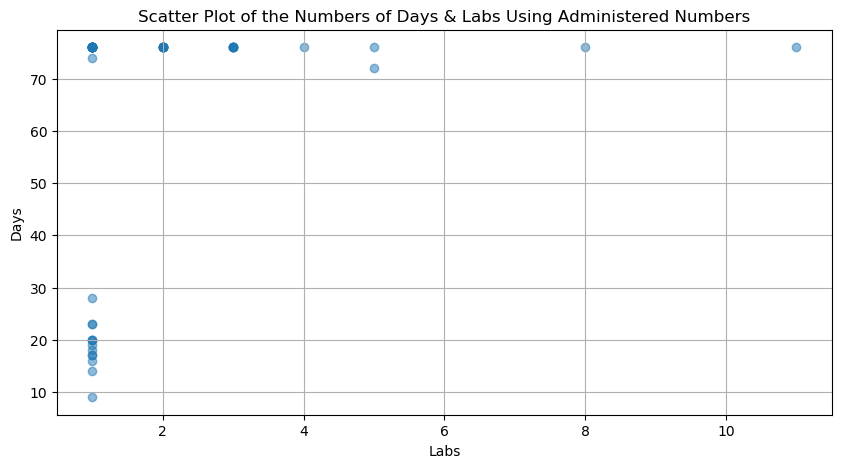

In [4]:
#Plot results
using PyPlot
x = x_test
y = t_test
fig = figure("pyplot_scatterplot",figsize=(10,5))
ax = PyPlot.axes()
scatter(x,y,alpha=0.5)

PyPlot.title("Scatter Plot of the Numbers of Days & Labs Using Administered Numbers")
xlabel("Labs")
ylabel("Days")
grid(true)

#### Scatter plot of results from Model 1A, depicting the number of days to test a subset of the total population in each state versus the number of labs per state required with a maximum sum of 100 labs and 1000 tests administered per lab per day. Lab values range from 1, the minimum amount required per state,  to 11 labs in New York. The minimum amount of days required to complete testing ranged from 9 days to 76. The population subset is number of tests to complete for each state are based on real values of how many tests each state has administered to date. These results show that a majority of states only had 1 lab, and there is a clear division in the number of days- either under 30 or over 70 days to complete.

### B. Model 1B ###
#### Testing the entire population of each state; 1000 tests per lab per day ####

In [22]:
# testing entire population of states

using JuMP, Gurobi

model = Model(with_optimizer(Gurobi.Optimizer, OutputFlag=false))

@variable(model, lab[1:length(n_states)] >= 0, Int) # number of labs in each state
@variable(model, days[1:length(n_states)] >= 0, Int) # number of days for each state to test
@variable(model, maxdays >= 0) # max value of days to complete testing

# sum of all labs across country must sum to 100
@constraint(model, sum(lab[i] for i in 1:length(n_states)) == n_labs)

# num of labs * 1000 tests * num of days to complete must be >= pop amount to be tested
for i in 1:length(n_states)
    @constraint(model, lab[i]*1000*days[i] >= pop_state[i])
end

# each state must have at least 1 lab
for i in 1:length(n_states)
    @constraint(model, lab[i] >= 1)
end

@constraint(model, maxdays .>= days) #  the max num of days from all states

# Minimize the maximum days it takes to finish testing all people of the states.
@objective(model, Min, maxdays)

optimize!(model)

# print results
t_test2 = value.(days)
x_test2 = value.(lab)

println()
println("Results: ")
for i in 1:length(n_states)
    println(states[i], " : ", value(lab[i]), " labs, ", value(days[i]), " days")
end
print("")
print("Minimum number of days to complete all testing: ",objective_value(model))

Academic license - for non-commercial use only
Academic license - for non-commercial use only

Results: 
DC : 1.0 labs, 721.0 days
NJ : 2.0 labs, 4469.0 days
RI : 1.0 labs, 1057.0 days
MA : 2.0 labs, 3489.0 days
CT : 1.0 labs, 3564.0 days
MD : 2.0 labs, 3042.0 days
DE : 1.0 labs, 983.0 days
NY : 5.0 labs, 4469.0 days
FL : 5.0 labs, 4399.0 days
OH : 3.0 labs, 3916.0 days
PA : 3.0 labs, 4274.0 days
CA : 9.0 labs, 4469.0 days
IL : 3.0 labs, 4220.0 days
HI : 1.0 labs, 1413.0 days
VA : 2.0 labs, 4314.0 days
NC : 3.0 labs, 3538.0 days
IN : 2.0 labs, 3373.0 days
GA : 3.0 labs, 3579.0 days
MI : 3.0 labs, 4469.0 days
SC : 2.0 labs, 2606.0 days
TN : 2.0 labs, 3449.0 days
NH : 1.0 labs, 1372.0 days
WA : 2.0 labs, 3899.0 days
KY : 1.0 labs, 4500.0 days
TX : 7.0 labs, 4469.0 days
WI : 2.0 labs, 2926.0 days
LA : 2.0 labs, 2323.0 days
AL : 2.0 labs, 4469.0 days
MO : 2.0 labs, 3085.0 days
WV : 1.0 labs, 1779.0 days
MN : 2.0 labs, 2851.0 days
VT : 1.0 labs, 629.0 days
AZ : 2.0 labs, 3690.0 days
MS : 1.

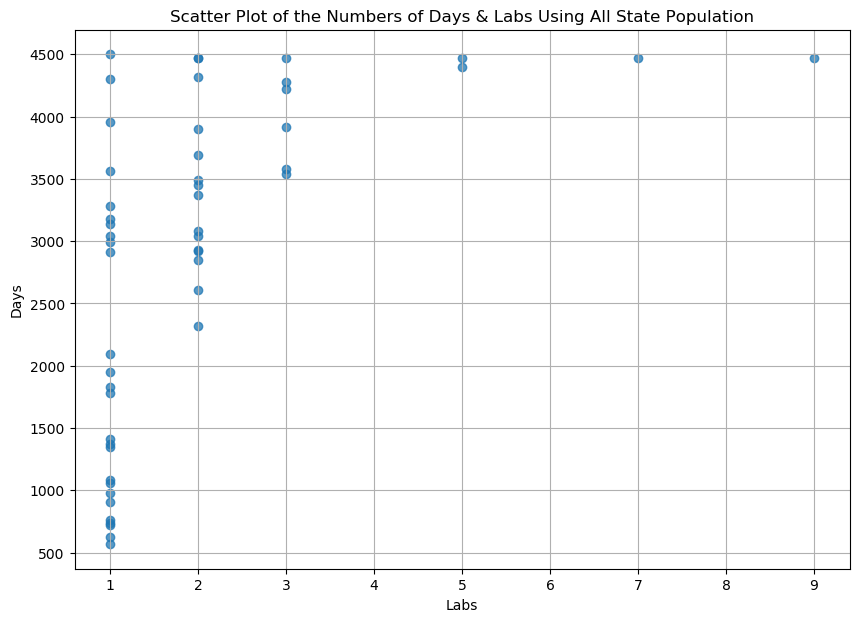

In [6]:
#Plot results
using PyPlot

x = x_test2
y = t_test2

fig = figure("pyplot_scatterplot",figsize=(10,7))
ax = PyPlot.axes()
scatter(x,y,alpha=0.75)

PyPlot.title("Scatter Plot of the Numbers of Days & Labs Using All State Population")
xlabel("Labs")
ylabel("Days")
grid(true)

#### Scatter plot of results from Model 1B, which calculated how many days it would take to tests each states' entire population using the same limit of 100 labs and 1000 tests per lab per day. Labs in this model ranged from 1 to 9, the largest amount being in California. The number of days ranged from 568 to 4500, which is a rather large spread. Most states contained a low number of labs, the vast majority having 3 or less.

## C. Model 2 ##

In [7]:
# Getting data
using CSV

raw = CSV.read("population.csv")

(m,n) = size(raw)

n_states = 1:m-1 # number of states

states = raw[n_states,1] # names of states
densitypop_per = convert(Vector{Float64}, raw[n_states,5]) # population density in percentage
pop_per =  convert(Vector{Float64}, raw[n_states,6]) # population in percentage
pop_state = convert(Vector{Float64}, raw[n_states,3]) # population in each state
;

In [8]:
raw2 = CSV.read("current2.csv")
(m,n) = size(raw2)

n_ppl = convert(Vector{Int64}, raw2[n_states,25]) # total number of people tested by state as of April 27
n_labs = 100 # number of labs
;

In [25]:
# testing the number of people the states have actually administered.
using JuMP, Gurobi

model = Model(with_optimizer(Gurobi.Optimizer, OutputFlag=false))

# parameters for amount of time it takes to build each size lab and # of tests that size can administer
sdays = 20 # 20 days to build small lab
mdays = 30 # 30 days for medium lab
ldays = 45 # 45 days for large lab
stests = 500 #500 tests for small lab per day
mtests = 1500 #1500 tests for medium lab per day
ltests = 2500 # 2500 tests for large lab per day

@variable(model, slab[1:length(n_states)] >= 0, Int) # number of small labs
@variable(model, mlab[1:length(n_states)] >= 0, Int) # number of medium labs
@variable(model, lglab[1:length(n_states)] >= 0, Int) # number of large labs
@variable(model, numDays[1:length(n_states)] >= 0, Int) # number of days to test without adding on building time
@variable(model, tests[1:length(n_states)] >= 0, Int) # total tests adminstered in state per day
@variable(model, lab[1:length(n_states)] >= 0, Int) # number of total labs in each state
@variable(model, days[1:length(n_states)] >= 0, Int) # number of days for each state to test
@variable(model, maxdays >= 0) # max value of days to complete testing

# sum of each lab size in state = total labs
for i in 1:length(n_states)
    @constraint(model, slab[i] + mlab[i] + lglab[i] == lab[i]) 
end

# num of small labs * time to build + med * time + large * time + testing time = total time
for i in 1:length(n_states)
    @constraint(model, slab[i]*sdays + mlab[i]*mdays + lglab[i]*ldays + numDays[i] == days[i])
end

# adds up number of tests administer in state that day
for i in 1:length(n_states)
    @constraint(model, (stests*slab[i] + mtests*mlab[i] + ltests*lglab[i]) == tests[i])
end

# if population over certain value then must have medium and large labs
for i in 1:length(n_states)
    if n_ppl[i] >= 50000 # testing over 50,000 requires at least 1 medium lab
        @constraint(model, mlab[i] >= 1)
    end
    if n_ppl[i] >= 100000 # testing over 100,000 requires at least 1 large lab
        @constraint(model, lglab[i] >= 1)
    end
end

# # of tests administered per day * # of days to test >= # of people to test
for i in 1:length(n_states)
    @constraint(model, tests[i]*numDays[i] >= n_ppl[i])
end

# sum of all labs across country must sum to 100 or less
@constraint(model, sum(lab[i] for i in 1:length(n_states)) <= n_labs)

# each state must have at least 1 lab
for i in 1:length(n_states)
    @constraint(model, lab[i] >= 1)
end

@constraint(model, maxdays .>= days) # max num of days from all states

# Minimize the maximum days it takes to finish testing all people of the states.
@objective(model, Min, maxdays)

optimize!(model)

# print results
x_test3 = value.(lab)
t_test3 = value.(days)

println()
println("Results: ")
for i in 1:length(n_states)
    println(states[i], " : ", value(lab[i]), " labs, ", "Small: ", value(slab[i]),"  ", "Medium: ", value(mlab[i]),"  ", "Large: ", value(lglab[i]),"  ", value(days[i]), " days")
end
print("")
println("Minimum number of days to complete all testing: ", objective_value(model))
a = 0
for i in 1:51
    a = a + value(lab[i])
end
print("Number of total labs: ", a)

Academic license - for non-commercial use only
Academic license - for non-commercial use only

Results: 
DC : 1.0 labs, Small: 1.0  Medium: -0.0  Large: 0.0  57.0 days
NJ : 2.0 labs, Small: 0.0  Medium: 1.0  Large: 1.0  132.0 days
RI : 1.0 labs, Small: -0.0  Medium: 1.0  Large: -0.0  68.0 days
MA : 2.0 labs, Small: -0.0  Medium: 1.0  Large: 1.0  137.0 days
CT : 1.0 labs, Small: -0.0  Medium: 1.0  Large: 0.0  84.0 days
MD : 2.0 labs, Small: 0.0  Medium: 1.0  Large: 1.0  102.0 days
DE : 1.0 labs, Small: 1.0  Medium: -0.0  Large: -0.0  60.0 days
NY : 3.0 labs, Small: -0.0  Medium: 1.0  Large: 2.0  248.0 days
FL : 2.0 labs, Small: -0.0  Medium: 1.0  Large: 1.0  165.0 days
OH : 2.0 labs, Small: -0.0  Medium: 1.0  Large: 1.0  105.0 days
PA : 2.0 labs, Small: -0.0  Medium: 1.0  Large: 1.0  126.0 days
CA : 2.0 labs, Small: -0.0  Medium: 1.0  Large: 1.0  214.0 days
IL : 2.0 labs, Small: -0.0  Medium: 1.0  Large: 1.0  132.0 days
HI : 1.0 labs, Small: 1.0  Medium: -0.0  Large: -0.0  79.0 days
VA 

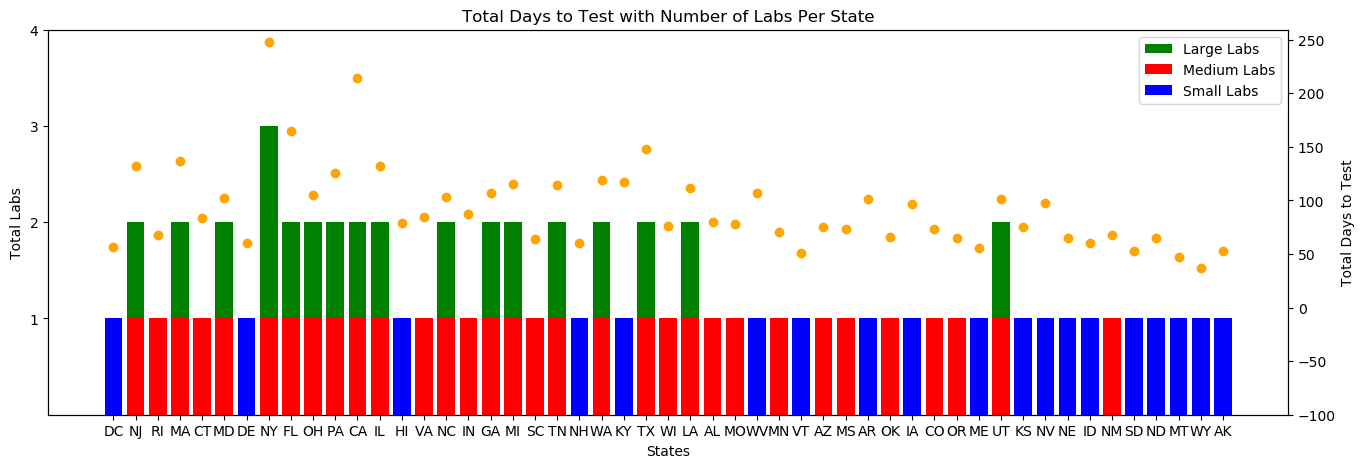

PyObject Text(23.999999999999993, 0.5, 'Total Labs')

In [31]:
#Plot results
using PyPlot

states = ["DC","NJ","RI","MA","CT","MD","DE","NY","FL","OH","PA","CA","IL","HI","VA","NC","IN","GA","MI","SC","TN","NH","WA","KY","TX","WI","LA","AL","MO","WV","MN","VT","AZ","MS","AR","OK","IA","CO","OR","ME","UT","KS","NV","NE","ID","NM","SD","ND","MT","WY","AK"]

fig = figure("pyplot_scatterplot",figsize=(16,5))
ax = PyPlot.axes()
ax2 = ax.twinx()
ax2.set_ylabel("Total Days to Test")
for i = 1:51
    ax.bar(i, value(lglab[i]), width = 0.8, color="green", align="center", label="Large Labs", bottom=value(slab[i]) + value(mlab[i]))
    ax.bar(i, value(mlab[i]), width = 0.8, color="red", align="center", label="Medium Labs", bottom=value(slab[i]))
    ax.bar(i, value(slab[i]), width = 0.8, color="blue", align="center", label="Small Labs")
end

for i = 1:51
    ax2.scatter(i, value(days[i]), color="orange")
end

xticks(1:51, states)
ax.set_yticks([1, 2, 3, 4])
ax2.set_ylim(bottom=-100)


PyPlot.title("Total Days to Test with Number of Labs Per State")
ax.legend(["Large Labs", "Medium Labs", "Small Labs"], loc=1)
ax.set_xlabel("States")
ax.set_ylabel("Total Labs")


#### Plot of the number of small, medium, and large labs per state and the total number of days to test the entire population of the respective state. The number of days (orange dots) range anywhere from 37 days to 248. The increased number of tests depending on lab size greatly reduced the need for multiple labs, with only a total of 69 labs.

## 4. Results and Discussion ##

#### Model 1:
Our first model chooses the number of labs and our minimial testing time for each state by using real data showing the total number of people tested, both postive and negative outcomes. Using the given case number and 1000 possible tests per lab per day parameters, we found the number of labs per state and minimum number of days required to test the given number of people. Our maximum number of days for any particular found in model 1 was 76 days, with quite a few different states having this value. Our minimum number of days was found in Wyoming, with only 9. One constraint demands that there must be at least 1 lab per state, and many states show this result, but also range much higher, with New York alone having 11 out of the 100 total labs.

#### Model 1A: 
This model calculates the number of labs and minimum number of days but instead based on the total state population. From the results printed it's possible to see how the number of labs changes based sheerly on population density rather than the virus density of Model 1, for example in this model New York only has 5 labs instead of 11. In our previous model the number of days to test ranged from 9 to 76, but with this model and the sheer number of tests to be administered with the same limit of 1000 tests caused the minimum amount of days to explode. The smallest value is in Wyoming, now with 568 days. Our largest value is found in Texas, with 4500 days to test- a whopping 12.3 years to test all Texans.

#### Model 2:

This model calculates the number of small, medium, and large labs for each state. The results suggest that there is an advantage to utilizing different sized labs, with different testing capacities, given that different labs can be constructed with varying build durations. This allows states to personalize their testing capacities, so states with a higher testing needs can do so with larger facilities, and states with smaller needs don't need to spend the time and resources on building a large facility.

#### Comparisons:
Comparing Model 1A to 1B, there is quite a difference in the amount of days to complete testing. In 1A we based our calculations on the amount of tests administered in each state as of 04/27, and in 1B we based calculations on the total state data. It seems that there is a correlation between state populations and the number of tests being administered to a certain extent, typically states with higher population densities such as California or New York have performed more tests- this is supported in the results of both models since both states have a higher need for labs than most other states. 

One thing that does become very clear, while model 1A shows reasonable amounts of days to complete tests that generally align with the amount of time these tests have taken in real life to administer, model 1B shows that in the long term this testing situation would be completely ineffective if the virus spread so widely that every citizen needed to be tested. As mentioned above, 12 years to test all citizens of Texas is a rather significant amount of time, you would lose the need to test before you would complete it if held to these constraints.

To remedy this to a certain extent we introduced Model 2, which allows states to choose between 3 lab sizes to meet their individual testing needs. The results for this model are overall higher, though, because the time to build the labs has also been taken into account and was not accounted for in Models 1A and 1B. The aim of this model would is to give estimations of the time needed to build more testing centers if the need for them became great enough.

In the context of the real life pandemic, these models aim to show the importance of testing, but also its limitedness and how much variability is present in each state in its needs and depending on the density of cases. If a person were to consider our models as a reasonably accurate estimate of the abilities of testing in the U.S., then it becomes very apparent that our testing facilities can only handle testing a relatively low amount of cases efficiently, if the virus becomes mass spread then the times to build new facilities adds up rather quickly, delaying the whole process by months- which could only have negative effects in terms of preventing the further spread.

#### Model limitations:
Of course, our models are far from perfect. With Model 1A and 1B the strict constraints of only 100 labs in the nation and 1000 test do not accurately reflect real life lab and tests amounts, which vary wildly from state to state and lab to lab. Model 2 considers the time to build the labs, but if a state needs more than one lab the model is set up that the labs are built one after another, not simultaneously, which is an obvious flaw since in real life the labs would more than likely be built at the same time. Therefore, because of the way we modeled the situation our results our heavily dependent on the assumptions we made and would more than likely vary a great amount based on the data being used.

## 5. Conclusion ##

We have implemented two types of models, one with assumptions that 100 test centers have equal size and daily capacitiy of testing and no other labs exist, and the other with assumptions that a small lab can test 500 tests daily, a medium lab can test 1,500 tests daily, and a large lab can test 2,500 test per day. We have also introduced the time it takes to build such labs to see if there is an advantagte to utilizing different sized labs. The result of the first model shows that it takes much time to test, but has a logical outcome as New York gets the most labs. The second model shows a different approach, one that considers different sized labs and testing capacities to meet the specific needs of states. These models make an attempt at roughing estimating the tests abilities of the United States during this pandemic.

#### Future direction:
In these models, we have only focused on minimizing the time it takes to test, but what we could also consider is that the pandemic disease might be more dangerous to a certain group of people. Below we attempted to analyze diffrent groups of people to see if there is anything to note. And we figured out that people with an age between 18 and 64 have a higher chance of getting infected for some reasons, whereas people with an age above 65 have much higher fatality rates than any other age groups. This analysis suggests that we need to take risk and condition into account when distributing testing labs. 

In [4]:
using CSV

death_data = CSV.read("death_by_age.csv")
death_data

,Age Group,Underlying Conditions,No Underlying Conditions,Underlying Conditions Unknown
,String,Int64,Int64,Int64
1,0-17,6,0,0
2,18-44,435,14,89
3,45-64,2557,60,356
4,65-74,2490,5,801
5,75 and over,4640,2,1863
6,unknown,0,0,1


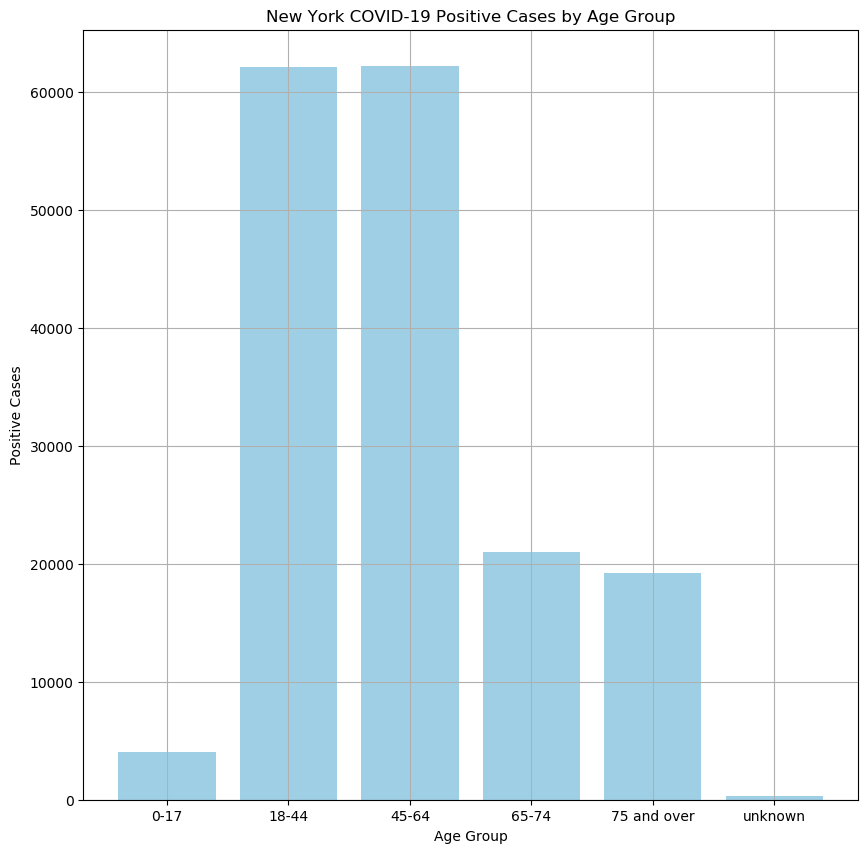

In [5]:
#Plot results
using PyPlot

x = death_data[1:6,1]
y = death_data[1:6,6]

fig = figure("pyplot_scatterplot",figsize=(10,10))
ax = PyPlot.axes()
#scatter(x,y,alpha=0.75)
bar(x,y,color="#0f87bf",align="center",alpha=0.4)

PyPlot.title("New York COVID-19 Positive Cases by Age Group")
xlabel("Age Group")
ylabel("Positive Cases")
grid(true)

In [7]:
b = Float64[]
for i in 1:length(death_data[1:6,6])
    push!(b,death_data[1:6,5][i]/death_data[1:6,6][i] * 100)
end
b
;

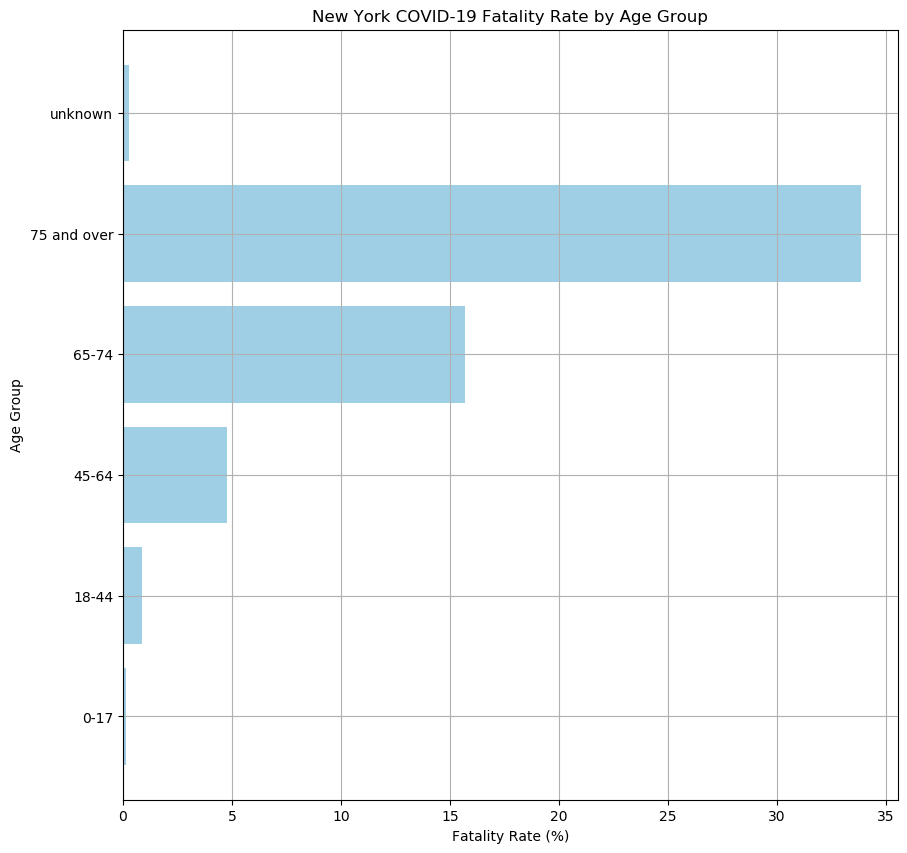

In [8]:
#Plot results
using PyPlot

x = death_data[1:6,1]
y = b

fig = figure("pyplot_scatterplot",figsize=(10,10))
ax = PyPlot.axes()
barh(x,y,color="#0f87bf",align="center",alpha=0.4)

PyPlot.title("New York COVID-19 Fatality Rate by Age Group")
xlabel("Fatality Rate (%)")
ylabel("Age Group")
grid(true)

Although the number of confirmed cases of group 18-44 and group 45-64 is high, the fatality rate for the age over 65 is much higher than the rest of groups. We can conclude that COVID-19 is highly dangerous for older people.

We saw that COVID-19 is very dangerous for older people, having a group with age more than 65 high fatality rate. In order to show the importance of having testing centers and the avaibility of tests to citizens to quickly identify citizens with the virus, we should take the fatality rate into account as well. Below we used Model 1A once again, this time requiring states with higher fatality rates to have at least 2 labs. 

In [35]:
using CSV

data3 = CSV.read("us_age_per3.csv")
data3

,Location,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64
,String,Float64,Float64,Float64,Float64,Float64
1,District of Columbia,0.2,0.1,0.21,0.27,0.1
2,New Jersey,0.23,0.08,0.11,0.27,0.14
3,Rhode Island,0.2,0.09,0.13,0.26,0.15
4,Massachusetts,0.21,0.09,0.13,0.26,0.14
5,Connecticut,0.22,0.08,0.11,0.27,0.15
6,Maryland,0.23,0.08,0.12,0.27,0.14
7,Delaware,0.22,0.08,0.12,0.25,0.14
8,New York,0.22,0.09,0.13,0.26,0.14
9,Florida,0.21,0.08,0.12,0.25,0.14


In [36]:
(m,n) = size(data3)
data3_65 =  convert(Vector{Float64}, data3[1:m,7])
data3_65
;

In [37]:

using JuMP, Gurobi

model = Model(with_optimizer(Gurobi.Optimizer, OutputFlag=false))

@variable(model, x[1:length(n_states)] >= 0, Int) # labs
@variable(model, t[1:length(n_states)] >= 0, Int) # days
@variable(model, k >= 0) # max value of t days

@constraint(model, sum(x[i] for i in 1:length(n_states)) == n_labs)

# Increased daily capacity to 1000.
# 
for i in 1:length(n_states)
    @constraint(model, x[i]*1000*t[i] >= n_ppl[i])
end

for i in 1:length(n_states)
    @constraint(model, x[i] >= 1)
end

# at least 2 labs for states with maximum fatality rate
for i in 1:length(n_states)
    if data3_65[i] >= maximum(data3_65)
        @constraint(model, x[i] >= 2)
    end
end

@constraint(model, k .>= t) # k to be the max

# Minimize the maximum days it takes to finish testing all people of the states.
@objective(model, Min, k)

optimize!(model)

for i in 1:length(n_states)
    println(states[i], " : ", value(x[i]), " labs, ", value(t[i]), " days")
end
print("")
print(objective_value(model))

Academic license - for non-commercial use only
Academic license - for non-commercial use only
DC : 1.0 labs, 19.0 days
NJ : 3.0 labs, 76.0 days
RI : 1.0 labs, 76.0 days
MA : 4.0 labs, 76.0 days
CT : 2.0 labs, 76.0 days
MD : 2.0 labs, 76.0 days
DE : 1.0 labs, 20.0 days
NY : 11.0 labs, 76.0 days
FL : 5.0 labs, 76.0 days
OH : 2.0 labs, 76.0 days
PA : 3.0 labs, 76.0 days
CA : 8.0 labs, 76.0 days
IL : 3.0 labs, 76.0 days
HI : 1.0 labs, 30.0 days
VA : 2.0 labs, 76.0 days
NC : 2.0 labs, 76.0 days
IN : 2.0 labs, 76.0 days
GA : 2.0 labs, 76.0 days
MI : 3.0 labs, 76.0 days
SC : 1.0 labs, 76.0 days
TN : 3.0 labs, 76.0 days
NH : 1.0 labs, 20.0 days
WA : 3.0 labs, 76.0 days
KY : 1.0 labs, 76.0 days
TX : 4.0 labs, 76.0 days
WI : 1.0 labs, 76.0 days
LA : 2.0 labs, 76.0 days
AL : 1.0 labs, 76.0 days
MO : 1.0 labs, 76.0 days
WV : 1.0 labs, 76.0 days
MN : 1.0 labs, 76.0 days
VT : 1.0 labs, 16.0 days
AZ : 1.0 labs, 76.0 days
MS : 1.0 labs, 76.0 days
AR : 1.0 labs, 76.0 days
OK : 1.0 labs, 76.0 days
IA : 

The results of this model are generally the same as Model 1A, with some slight variations. Acquiring further data and incorporating it to make a more dynamic model might change the results more- an interesting idea for future work.

## 6. Author Contributions

Note: The contributions in each category must sum to 100%. See Canvas for more details on what type of work belongs in each category.
Student A: Nathan
Student B: Gerrard
Student C: Dana

#### 1. Modelling  
Student A: Percentage contribution 20%  
Student B: Percentage contribution 45%  
Student C: Percentage contribution 35%  

  
#### 2. Analysis  
Student A: Percentage contribution 35%  
Student B: Percentage contribution 25%  
Student C: Percentage contribution 40%  


#### 3. Data Gathering  
Student A: Percentage contribution 50%  
Student B: Percentage contribution 30%  
Student C: Percentage contribution 20%  


#### 4. Software Implementation  
Student A: Percentage contribution 33%  
Student B: Percentage contribution 33%  
Student C: Percentage contribution 33%  


#### 5. Report writing 
Student A: Percentage contribution 33%  
Student B: Percentage contribution 33%  
Student C: Percentage contribution 33%  